In [37]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline

In [2]:
path = 'data/ml-latest-small/'

In [3]:
os.listdir(path)

['links.csv', 'tags.csv', 'ratings.csv', 'README.txt', 'movies.csv']

In [4]:
rating_df = pd.read_csv(os.path.join(path+'ratings.csv'),encoding = 'utf-8')
tags_df = pd.read_csv(os.path.join(path+'tags.csv'),encoding = 'utf-8')
movies_df = pd.read_csv(os.path.join(path+'movies.csv'),index_col = 'movieId',encoding = 'utf-8')

## 평점 데이터의 기초 통계량

In [5]:
n_unique_users = len(rating_df['userId'].unique())

In [6]:
n_unique_movies = len(rating_df['movieId'].unique())

In [7]:
print("평점의 평균 : ",rating_df['rating'].mean())
print("평점의 표준편차: ",rating_df['rating'].std())

평점의 평균 :  3.501556983616962
평점의 표준편차:  1.0425292390605359


In [8]:
rating_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
rating_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

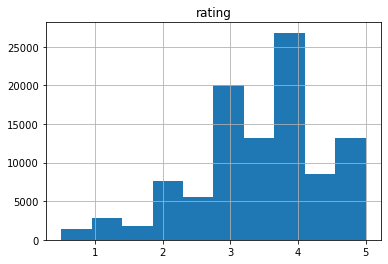

In [10]:
rating_df[['rating']].hist()

In [11]:
rating_df.groupby(['userId','rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [12]:
rating_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [13]:
import seaborn as sns

In [14]:
user_info = rating_df.groupby('userId')['rating'].count()

In [15]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: rating, dtype: float64

<AxesSubplot:xlabel='rating', ylabel='Density'>

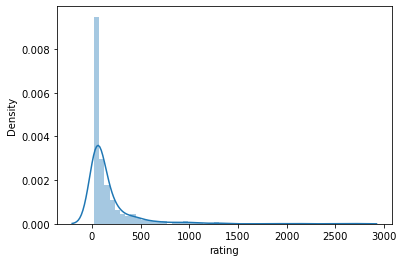

In [16]:
sns.distplot(user_info)

In [17]:
status_df = pd.DataFrame({
    'movie_count':rating_df.groupby('userId')['movieId'].count(),
    'rating_avg':rating_df.groupby('userId')['rating'].mean(),
    'rating_std':rating_df.groupby('userId')['rating'].std()
})

In [18]:
status_df.head()

,movie_count,rating_avg,rating_std
userId,,,
1,232,4.366379,0.800048
2,29,3.948276,0.805615
3,39,2.435897,2.090642
4,216,3.555556,1.314204
5,44,3.636364,0.990441


In [19]:
movieid_user_df = pd.DataFrame({
    "num_users_watch":rating_df.groupby('movieId')['userId'].count(),
    "avg_ratings":rating_df.groupby('movieId')['rating'].mean(),
    "std_ratings":rating_df.groupby('movieId')['rating'].std()
})

In [20]:
movieid_user_df.sort_values(by = 'num_users_watch',ascending = False)

,num_users_watch,avg_ratings,std_ratings
movieId,,,
356,329,4.164134,0.831244
318,317,4.429022,0.713019
296,307,4.197068,0.951997
593,279,4.161290,0.853983
2571,278,4.192446,0.975243
...,...,...,...
4093,1,1.500000,NaN
4089,1,2.000000,NaN
58351,1,4.000000,NaN


<AxesSubplot:>

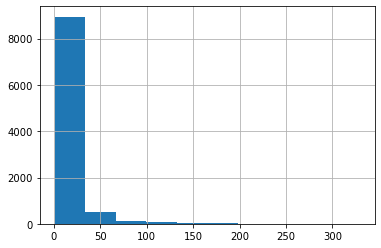

In [25]:
movieid_user_df['num_users_watch'].hist()

In [27]:
df = pd.DataFrame({
    'rating_count': rating_df.groupby('movieId')['userId'].count()
})

In [29]:
df['movie_name'] = df.apply(lambda x:movies_df['title'].loc[x.index])

In [30]:
df

,rating_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)
...,...,...
193581,1,Black Butler: Book of the Atlantic (2017)
193583,1,No Game No Life: Zero (2017)
193585,1,Flint (2017)


<AxesSubplot:>

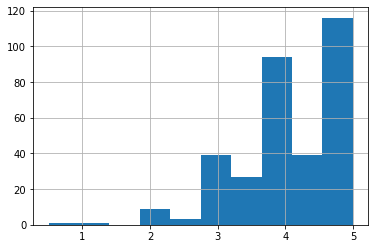

In [32]:
rating_df[rating_df.movieId == 356]['rating'].hist()

<AxesSubplot:>

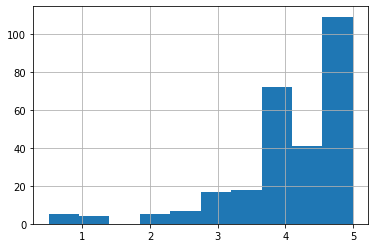

In [33]:
rating_df[rating_df.movieId == 2571]['rating'].hist()

In [34]:
rating_df[(rating_df.movieId== 2571)&(rating_df.rating<2)]

,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


<AxesSubplot:>

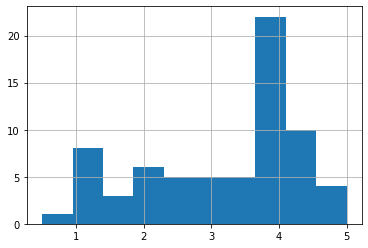

In [35]:
rating_df[rating_df.userId==75]['rating'].hist()

In [39]:
import itertools

In [42]:
all_genre = [x.split('|') for x in movies_df['genres'].values]

In [44]:
genres = list(set(list(itertools.chain(*all_genre))))

In [46]:
len(genres)

20

In [48]:
genres_df = movies_df['genres'].str.get_dummies(sep='|')
genres_df.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
movies_df = pd.concat([movies_df,genres_df],axis = 1)

In [50]:
movies_df.head()

,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
movies_df.drop('genres',axis=1 ,inplace = True)

In [52]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
movieId_list = movies_df['title'][movies_df.Animation == 1]
movieId_list.index

Int64Index([     1,     13,     48,    239,    313,    364,    551,    558,
               588,    594,
            ...
            182639, 183897, 187541, 190219, 193565, 193567, 193573, 193581,
            193583, 193587],
           dtype='int64', name='movieId', length=611)

In [54]:
animation_df = rating_df[rating_df['movieId'].isin(movieId_list.index)]

In [56]:
animation_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
35,1,596,5.0,964982838
38,1,661,5.0,964982838
39,1,673,3.0,964981775
50,1,1023,5.0,964982681
...,...,...,...,...
100798,610,146309,4.0,1493850187
100805,610,149406,3.5,1479542295
100808,610,152081,4.0,1493846503
100813,610,157296,4.0,1493846563


In [57]:
animation_df.groupby('userId')['rating'].mean()

userId
1      4.689655
3      0.500000
4      4.000000
5      4.333333
6      4.071429
         ...   
606    3.714286
607    3.333333
608    3.118182
609    3.000000
610    3.901515
Name: rating, Length: 527, dtype: float64

In [58]:
# + 양 상관, - 음 상관
genres_df.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


In [59]:
title_df = movies_df.copy()
title_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')

In [63]:
title_df[['year']].head()

,year
movieId,
1,(1995)
2,(1995)
3,(1995)
4,(1995)
5,(1995)


In [64]:
title_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64

In [67]:
title_df.dropna(axis = 0 ,inplace = True)
title_df['year'] = title_df['year'].apply(lambda x : x.replace('(','').replace(')',''))

In [68]:
title_df['year'].head()

movieId
1    1995
2    1995
3    1995
4    1995
5    1995
Name: year, dtype: object

In [69]:
year_freq_df = title_df.groupby('year')['title'].count()

In [70]:
year_freq_df.sort_values(ascending=False)

year
2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1919      1
1917      1
1915      1
1908      1
1902      1
Name: title, Length: 106, dtype: int64

In [81]:
rating_df['rating'][rating_df['movieId'].isin(title_df[title_df['year']=='2017'].index)].mean()

3.5780911062906724

In [89]:
result = []
for year in title_df['year'].unique():
    avg_rating = rating_df['rating'][rating_df['movieId'].isin(title_df[title_df['year']==year].index)].mean()
    result.append((year,avg_rating))
    
result_df = pd.DataFrame(result,columns = ['year','year_avg_rating'])
result_df.sort_values(by = 'year')

,year,year_avg_rating
91,1902,3.500000
92,1903,2.500000
105,1908,4.000000
84,1915,2.000000
87,1916,3.600000
...,...,...
100,2014,3.512879
101,2015,3.410386
102,2016,3.387261
103,2017,3.578091


array([[<AxesSubplot:title={'center':'year_avg_rating'}>]], dtype=object)

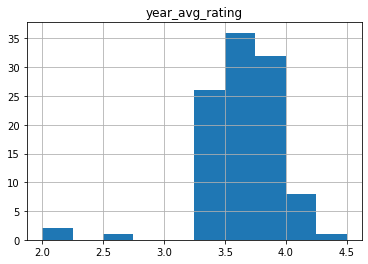

In [94]:
#년도별 평점 분포도 -> 3.5~4.0을 받은 year가 가장 많다
result_df.hist()